# NNIA: Tutorial 5 - 12.12.2017

---

In [1]:
# Set notebook to full width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Assignment-5

#### 1. [Practicing Backpropagation](http://cs231n.github.io/optimization-2/#grad)

Given the following function $$ f(x, y) = \frac{x + \sigma(y)}{\sigma(x) + (x+y)^2}$$ with $\sigma(x) = \frac{1}{1+e^{-x}}$ and $x, y \in \mathbb{R}$.

In [2]:
import math

# Define primitives

def add(x, y):
    return x + y

def mult(x, y):
    return x * y

def square(x):
    return x ** 2

def exp(x):
    return math.exp(x)

def divide(x):
    return 1 / x

def sigmoid(x):
    return divide(add(1, exp(mult(-1, x))))

def f(x, y):
    return mult(add(x, sigmoid(y)), divide(add(sigmoid(x), square(add(x, y)))))

print(f(2, 3))

0.11408358552197742


In [3]:
# Define local derivatives of the primitives

def dadd(x, y):
    return 1.0

def dmult(x, y, dx, dy):
    return x * dy + y * dx

def dmult_left(x, y):
    return y

def dmult_right(x, y):
    return x

def dsquare(x):
    return 2 * x

def dexp(x):
    return exp(x)

def ddivide(x):
    return -1.0 * (1.0 / x ** 2)

def dsigmoid(x):
    return sigmoid(x) * (1.0 - sigmoid(x))

In [4]:
# Compute forward pass for specific values of x and y
x = 2
y = 3

def forward(x, y):
    m = {}
    
    # Numerator
    m['0'] = sigmoid(y) # sigmoid(y)
    m['1'] = add(x, m['0']) # numerator
    
    # Denominator
    m['2'] = sigmoid(x) # sigmoid(x)
    m['3'] = add(x, y) # (x + y)
    m['4'] = square(m['3']) # (x + y)^2
    m['5'] = add(m['2'], m['4']) # denominator
    
    # f
    m['6'] = divide(m['5']) # 1 / denominator
    m['7'] = mult(m['1'], m['6']) # numerator * denominator
    
    return m

evaluate_forward = forward(x, y)
print(list(evaluate_forward.values())[-1])

0.11408358552197742


In [5]:
# Compute backward pass

def backward(x, y):
    
    f = forward(x, y)
    m = {}
    
    m['0'] = 1.0 # df/df
    
    # df/dnum
    m['1'] = m['0'] * f['6'] # df/d1 = df/df * df/d1 
    m['2'] = m['1'] * 1.0 # df/dx = df/df * df/d1 * d1/dx
    m['3'] = m['1'] * 1.0 # df/d0 = df/df * df/d1 * d1/d0
    m['4'] = m['3'] * 1.0 * (sigmoid(y) * (1 - sigmoid(y))) # df/dy = df/df * df/d1 * d1/d0 * d0/dy
    
    # df/ddom
    m['5'] = m['0'] * f['1'] # df/d6 = df/df * df/d6
    m['6'] = m['5'] * (-1.0 * (1.0 / f['5'] ** 2)) # df/d5 = df/df * df/d6 * d6/d5
    m['7'] = m['6'] * 1.0  # df/d2 = df/df * df/d6 * d6/d5 * d5/d2
    m['8'] = m['6'] * 1.0  # df/d4 = df/df * df/d6 * d6/d5 * d5/d4
    m['9'] = m['7'] * (sigmoid(x) * (1.0 - sigmoid(x)))  # df/dx = df/df * df/d6 * d6/d5 * d5/d2 * d2/dx
    m['10'] = m['8'] * 2 * f['3'] # df/d3 = df/df * df/d6 * d6/d5 * d5/d4 * d4/d3
    m['11'] = m['10'] * 1.0 # df/dx = df/df * df/d6 * d6/d5 * d5/d4 * d4/d3 * d3/dx
    m['12'] = m['10'] * 1.0 # df/dy = df/df * df/d6 * d6/d5 * d5/d4 * d4/d3 * d3/dy
    
    # Add up results for df/dx and df/dy
    m['13'] = m['2'] + m['9'] + m['11']
    m['14'] = m['4'] + m['12']
    
    return m

evaluate_backward = backward(x, y)
print(list(evaluate_backward.values())[-2])
print(list(evaluate_backward.values())[-1])

-0.00590452834350471
-0.04233483196779766


In [6]:
# Compute backward pass

def backward2(x, y):
    
    f = forward(x, y)
    m = {}
    
    m['0'] = 1.0 # df/df
    
    # df/dnum
    m['1'] = m['0'] * f['6'] # df/d1 = df/df * df/d1 
    m['2'] = m['1'] * 1.0 # df/dx = df/df * df/d1 * d1/dx
    m['3'] = m['1'] * 1.0 # df/d0 = df/df * df/d1 * d1/d0
    m['4'] = m['3'] * 1.0 * (f['0'] * (1 - f['0'])) # df/dy = df/df * df/d1 * d1/d0 * d0/dy
    
    # df/ddom
    m['5'] = m['0'] * f['1'] # df/d6 = df/df * df/d6
    m['6'] = m['5'] * (-1.0 * (1.0 / f['5'] ** 2)) # df/d5 = df/df * df/d6 * d6/d5
    m['7'] = m['6'] * 1.0  # df/d2 = df/df * df/d6 * d6/d5 * d5/d2
    m['8'] = m['6'] * 1.0  # df/d4 = df/df * df/d6 * d6/d5 * d5/d4
    m['9'] = m['7'] * (f['2'] * (1 - f['2']))  # df/dx = df/df * df/d6 * d6/d5 * d5/d2 * d2/dx
    m['10'] = m['8'] * 2 * f['3'] # df/d3 = df/df * df/d6 * d6/d5 * d5/d4 * d4/d3
    m['11'] = m['10'] * 1.0 # df/dx = df/df * df/d6 * d6/d5 * d5/d4 * d4/d3 * d3/dx
    m['12'] = m['10'] * 1.0 # df/dy = df/df * df/d6 * d6/d5 * d5/d4 * d4/d3 * d3/dy
    
    # Add up results for df/dx and df/dy
    m['13'] = m['2'] + m['9'] + m['11']
    m['14'] = m['4'] + m['12']
    
    
    return m

evaluate_backward2 = backward2(x, y)
print(list(evaluate_backward2.values())[-2])
print(list(evaluate_backward2.values())[-1])

-0.00590452834350471
-0.04233483196779766


In [7]:
# Compute backward pass

def backward3(x, y):
    
    f = forward(x, y)
    m = {}
    
    m['0'] = 1.0 # df/df
    
    # df/dnum
    m['1'] = m['0'] * dmult_left(f['1'], f['6']) # df/d1 = df/df * df/d1 
    m['2'] = m['1'] * dadd(f['2'], f['4']) # df/dx = df/df * df/d1 * d1/dx
    m['3'] = m['1'] * dadd(f['2'], f['4']) # df/d0 = df/df * df/d1 * d1/d0
    m['4'] = m['3'] * dsigmoid(y) # df/dy = df/df * df/d1 * d1/d0 * d0/dy
    
    # df/ddom
    m['5'] = m['0'] * dmult_right(f['1'], f['6']) # df/d6 = df/df * df/d6
    m['6'] = m['5'] * ddivide(f['5']) # df/d5 = df/df * df/d6 * d6/d5
    m['7'] = m['6'] * dadd(f['2'], f['4']) # df/d2 = df/df * df/d6 * d6/d5 * d5/d2
    m['8'] = m['6'] * dadd(f['2'], f['4']) # df/d4 = df/df * df/d6 * d6/d5 * d5/d4
    m['9'] = m['7'] * dsigmoid(x) # df/dx = df/df * df/d6 * d6/d5 * d5/d2 * d2/dx
    m['10'] = m['8'] * dsquare(f['3']) # df/d3 = df/df * df/d6 * d6/d5 * d5/d4 * d4/d3
    m['11'] = m['10'] * dadd(x, y) # df/dx = df/df * df/d6 * d6/d5 * d5/d4 * d4/d3 * d3/dx
    m['12'] = m['10'] * dadd(x, y) # df/dy = df/df * df/d6 * d6/d5 * d5/d4 * d4/d3 * d3/dy
    
    # Add up results for df/dx and df/dy
    m['13'] = m['2'] + m['9'] + m['11']
    m['14'] = m['4'] + m['12']
    
    return m

evaluate_backward3 = backward3(x, y)
print(list(evaluate_backward3.values())[-2])
print(list(evaluate_backward3.values())[-1])

-0.00590452834350471
-0.04233483196779766


---

**Check derivatives**: Numerically

In [8]:
x = 2; y = 3
h = 1e-6
dfdx = (f(x + h, y) - f(x, y)) / h
dfdy = (f(x, y + h) - f(x, y)) / h

print('df/dx = {:.8f} at [x=2, y=3]'.format(dfdx))
print('df/dy = {:.8f} at [x=2, y=3]'.format(dfdy))

df/dx = -0.00590453 at [x=2, y=3]
df/dy = -0.04233482 at [x=2, y=3]


---

**Check derivatives**: Using TensorFlow

In [9]:
import numpy as np
import tensorflow as tf

g = tf.Graph()

with g.as_default():
    
    with tf.variable_scope('ex1'):
        
        x = tf.placeholder(dtype=tf.float32, shape=[], name='x')
        y = tf.placeholder(dtype=tf.float32, shape=[], name='y')

        with tf.name_scope('numerator'):
            num = x + tf.sigmoid(y)

        with tf.name_scope('denominator'):
            den = tf.sigmoid(x) + tf.square(x + y)

        with tf.name_scope('f'):
            f = num / den

        with tf.name_scope('dfdw'):
            dfdx = tf.gradients(f, x)[0]

        with tf.name_scope('dfdb'):
            dfdy = tf.gradients(f, y)[0]

with tf.Session(graph=g) as sess:
    # Store computation graph for displaying with TensorBoard
    tf.summary.FileWriter('./log/ex1', sess.graph)
    
    f_eval, dfdx_eval, dfdy_eval = sess.run([f, dfdx, dfdy], feed_dict={x: 2.0, y: 3.0})
    print('f = {:.8f} at [x=2, y=3]'.format(f_eval))
    print('df/dx = {:.8f} at [x=2, y=3]'.format(dfdx_eval))
    print('df/dy = {:.8f} at [x=2, y=3]'.format(dfdy_eval))

f = 0.11408360 at [x=2, y=3]
df/dx = -0.00590453 at [x=2, y=3]
df/dy = -0.04233484 at [x=2, y=3]


---

#### 2. Feed-forward Neural Network in Tensorflow

In [10]:
# Imports
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt

Let's create some dummy data using the scikit-learn library.

In [11]:
# Get some data
X, y = make_circles(n_samples= 300, noise=0.05, random_state=123)

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)
y_train = np.reshape(y_train, newshape=(-1, 1))
y_test = np.reshape(y_test, newshape=(-1, 1))

In [12]:
def plot_data(X_train, y_train):
    # Plot the training data, test data and decision boundary
    style = 'seaborn-poster'
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    
    with plt.style.context(style):
        # Plot the training data and color the data point according to their class label
        fig, axes = plt.subplots(1, 1)
        axes.scatter(X_train[: , 0], X_train[: , 1], c=y_train, cmap='Set1')
        axes.set_title(r'Training Data');

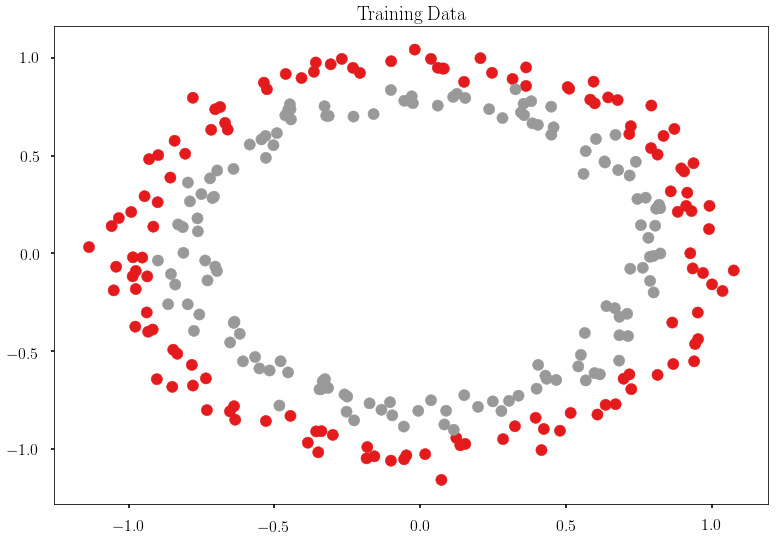

In [13]:
# Let's plot the training data
plot_data(X_train, y_train)

In [14]:
# Plot the decision boundary of your model
def plot_boundary(sess, X_train, y_train, X_test, y_test, predictions):
    x1_min = X_train[:, 0].min() - 0.2 
    x1_max = X_train[:, 0].max() + 0.2 
    x2_min = X_train[:, 1].min() - 0.2
    x2_max = X_train[:, 1].max() + 0.2  
    
    grid = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.05))
    xx, yy = grid
    X_grid = np.stack([np.ravel(xx), np.ravel(yy)]).T
    
    # Evaluate predictions on grid
    predictions_val = sess.run(predictions, feed_dict={x: X_grid})
    z = np.reshape(predictions_val, newshape=xx.shape)
    
    # Plot the training data, test data and decision boundary
    style = 'seaborn-poster'
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    
    with plt.style.context(style):
        fig, axes = plt.subplots(1, 1)
        axes.scatter(X_train[: , 0], X_train[: , 1], c=y_train, cmap='Set1', marker='o', label=r'Training Data')
        axes.scatter(X_test[: , 0], X_test[: , 1], c=y_test, cmap='Set1', marker='x', label=r'Test Data')
        axes.contourf(xx, yy, z, alpha=.3, levels=[0, 0.5], cmap='Blues')
#         axes.contourf(xx, yy, z, alpha=.3, levels=[0, 0.25, 0.5, 0.75, 1.0], cmap='Blues')
        axes.get_xaxis().set_ticks([])
        axes.get_yaxis().set_ticks([])
        axes.set_title(r'Decision Boundary')
        axes.legend();

#### 1) The quick way

In [15]:
def model(input_shape, n_hidden_units, x):
    # Define hidden layer
    W1 = tf.get_variable('weights' + '-hidden', shape=[input_shape[1], n_hidden_units], dtype=tf.float32, initializer=tf.random_normal_initializer())
    b1 = tf.get_variable('biases' + '-hidden', shape=[n_hidden_units], dtype=tf.float32, initializer=tf.random_normal_initializer())
    a1 = tf.nn.relu(tf.matmul(x, W1) + b1)
    
    # Define output layer
    W2 = tf.get_variable('weights' + '-output', shape=[n_hidden_units, 1], dtype=tf.float32, initializer=tf.random_normal_initializer())
    b2 = tf.get_variable('biases' + '-output', shape=[], dtype=tf.float32, initializer=tf.random_normal_initializer())
    a2 = tf.matmul(a1, W2) + b2
    return a2

In [16]:
g = tf.Graph()

with g.as_default():
    # Define the computational graph for your model
    input_shape = (None, 2) # each input has 2 features
    output_shape = (None, 1) # the output of the model is a scalar corresponding to the probability of belong to class 1 or 2.

    # Define placeholers for the input and output
    x = tf.placeholder(tf.float32, shape=input_shape, name='X')
    y = tf.placeholder(tf.float32, shape=output_shape, name='y')

    # Get model prediction
    unscaled_logits = model(input_shape, 128, x)
    predictions = tf.nn.sigmoid(unscaled_logits)

    # Get accuracy
    model_prediction = tf.greater_equal(predictions, 0.5)
    model_prediction = tf.cast(model_prediction, tf.float32)
    ground_truth = y
    correct_prediction = tf.equal(model_prediction, ground_truth)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    # Compute loss
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=unscaled_logits))

    # Define opzimizer
    learning_rate = 1e-1
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    step = optimizer.minimize(loss)
    
    # Define init op
    init = tf.global_variables_initializer()

Size of training data: 270
Batch size: 10
Number of iterations per epoch: 27
Epoch: 0, Training Accuracy: 0.51
Epoch: 1, Training Accuracy: 0.58
Epoch: 2, Training Accuracy: 0.88
Epoch: 3, Training Accuracy: 0.95
Epoch: 4, Training Accuracy: 0.89
Epoch: 5, Training Accuracy: 0.93
Epoch: 6, Training Accuracy: 0.89
Epoch: 7, Training Accuracy: 0.73
Epoch: 8, Training Accuracy: 0.96
Epoch: 9, Training Accuracy: 0.97
Test Accuracy: 0.97


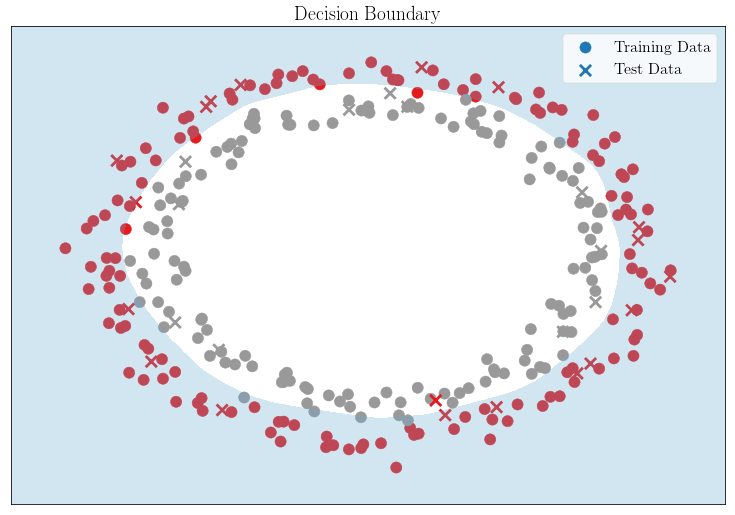

In [17]:
epochs = 10 # we train our model for 10 epochs. You can change this value to observe how the accuracy changes.
batch_size = 10 # we use a fixed batch size of 10 data points per batch.
n = len(X_train)

print('Size of training data: {:d}'.format(n))

# Start a Session 
with tf.Session(graph=g) as sess:
    
    # Initialize all variables
    sess.run(init)
    
    batches = int(math.ceil(float(n / batch_size)))
    print('Batch size: {:d}'.format(batch_size))
    print('Number of iterations per epoch: {:d}'.format(batches))
        
    # TODO: Perform training
    for epoch in range(epochs):
        
        # Shuffle training data
        indices = list(range(len(X_train)))
        np.random.shuffle(indices)
        
        # Iterate through the training data in batches
        for batch in range(batches):
            start = int(batch * batch_size)
            end = int((batch + 1) * batch_size)
            
            if end > n:
                # Reuse some of the training data from the previous batch
                shift = end - n
                start -= shift
                end -= shift
            
            # Create batch
            feed_dict = {x: X_train[indices[start:end]], y: y_train[indices[start:end]]}
            
            # Perform a single step of stochastic gradient descent
            sess.run(step, feed_dict=feed_dict)
        
        # Check that every training input has been seen at least once
        assert end == n
            
        # Get accuracy and summaries on training data at the end of each epoch 
        feed_dict = {x: X_train, y: y_train}
        acc = sess.run(accuracy, feed_dict=feed_dict)
        
        # Print accuracy
        print('Epoch: {:d}, Training Accuracy: {:.2f}'.format(epoch, acc))
    
    # Get accuracy on test data at the end of training 
    feed_dict = {x: X_test, y: y_test}
    acc = sess.run(accuracy, feed_dict=feed_dict)
    print('Test Accuracy: {:.2f}'.format(acc))
    
    plot_boundary(sess, X_train, y_train, X_test, y_test, predictions)

#### 2) The reusable way

In [18]:
# TODO: implement the function below.
# Hint: The following methods might be useful: tf.get_variable(), tf.random_normal_initializer(), tf.matmul(), tf.get_variable()
def linear_layer(input_shape, n_hidden_units, x):
    """
    Define a linear layer for your neural network.
    :param input_shape: The shape of the input for the layer. Be careful to consider that your data comes in batches. 
    :param n_hidden: The number of hidden units.
    :param x: The input to the layer.
    :return: A tuple where the first element is the linear combination of the input with the weights and the biases of the linear layer and the second element is the shape of the output matrix.
    """
    with tf.name_scope('Linear'):
        output_shape = [input_shape[0], n_hidden_units]
        W = tf.get_variable('weights', shape=[input_shape[1], n_hidden_units], 
                            dtype=tf.float32, initializer=tf.random_normal_initializer())
        b = tf.get_variable('biases', shape=[n_hidden_units], 
                            dtype=tf.float32, initializer=tf.random_normal_initializer())
        output = tf.matmul(x, W) + b
        output = tf.identity(output, name='linear-combination')
    return output, output_shape

In [19]:
# TODO: implement the function below.
def relu(x):
    """
    Define the ReLU activation function.
    :param x: The input to the activation function.
    :return: The output of the activation function.
    """
    with tf.name_scope('ReLU'):
        activation = tf.nn.relu(x)
        activation = tf.identity(activation, name='relu')
    return activation

In [20]:
# TODO: implement the function below.
def sigmoid(x):
    """
    Define the sigmoid activation function.
    :param x: The input to the activation function.
    :return: The output of the activation function.
    """
    with tf.name_scope('Sigmoid'):
        activation = tf.nn.sigmoid(x)
        activation = tf.identity(activation, name='softmax')
    return activation

In [21]:
# TODO: implement the function below.
def cross_entropy_loss(labels, unscaled_logits):
    """
    Define the cross entropy loss function between the true labels and the model predictions. Be careful to consider that your data comes in batches.
    :param labels: The true labels.
    :param unscaled_logits: The final activations produced by your model.
    :return: The loss value (a scalar).
    """
    diff = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=unscaled_logits)
    cross_entropy = tf.reduce_mean(diff)
    cross_entropy = tf.identity(cross_entropy, name='cross-entropy-loss')
    return cross_entropy

In [22]:
n_hidden_units = 128

# TODO: implement the function below. This is where you build up your model architecture using the layers defined above.
def forward(x, input_shape):
    """
    Define the forward pass of your network. Be careful to consider that your data comes in batches.
    :param x: The input to your model.
    :param input_shape: The shape of the input.
    :return: The (unscaled) logit computed by the network.
    """
    with tf.variable_scope('hidden-layer-1'):
        h, output_shape = linear_layer(input_shape, n_hidden_units, x)
        h = relu(h)
    with tf.variable_scope('output-layer'):
        unscaled_logits, output_shape = linear_layer(output_shape, 1, h)
    return unscaled_logits

In [23]:
# TODO: implement the function below.
def inference(unscaled_logits):
    """
    Define the predictions computed by your network
    :param unscaled_logits: The (unscaled) logit computed by the network.
    :return: The prediction of your model on input x.
    """
    prediction = sigmoid(unscaled_logits)
    prediction = tf.identity(prediction, name='prediction')
    return prediction

In [24]:
# TODO: implement the function below.
def loss(x, y, input_shape):
    """
    Define the loss between the prediction of your model and the actual label.
    :param x: The input to your model.
    :param y: The shape of the input.
    :param input_shape: The loss between what your model predicts and the true label.
    :return: 
    """
    unscaled_logits = forward(x, input_shape)
    loss = cross_entropy_loss(y, unscaled_logits)
    loss = tf.identity(loss, name='ce-loss')
    return loss

In [25]:
# Define the computational graph for your model
input_shape = (None, 2) # each input has 2 features
output_shape = (None, 1) # the output of the model is a scalar corresponding to the probability of belong to class 1 or 2.

# Define placeholers for the input and output
with tf.name_scope('Inputs'):
    x = tf.placeholder(tf.float32, shape=input_shape, name='X')
    y = tf.placeholder(tf.float32, shape=output_shape, name='y')

# Define the model final activations, predictions and loss of the network
with tf.variable_scope('model') as scope:
    # Define the final activations computed during the forward pass
    with tf.name_scope('Logits'):
        unscaled_logits = forward(x, input_shape)
    
    # Define the model prediction
    with tf.name_scope('Inference'):
        scope.reuse_variables()
        predictions = inference(unscaled_logits)
    
    # Define the loss function
    with tf.name_scope('Loss'):
        scope.reuse_variables()
        loss_function = loss(x, y, input_shape)
        
# Define accuracy and error of the model
with tf.name_scope('Accuracy'):
    model_prediction = tf.greater_equal(predictions, 0.5)
    model_prediction = tf.cast(model_prediction, tf.float32)
    ground_truth = y
    correct_prediction = tf.equal(model_prediction, ground_truth)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    error = 1.0 - accuracy
    
# Define the gradient descent optimizer
with tf.name_scope('Optimizer'):
    learning_rate = 1e-1
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    step = optimizer.minimize(loss_function)
    
# Add summary variables for TensorBoard
with tf.name_scope('Loss-Summaries'):
    tf.summary.scalar(loss_function.op.name, loss_function)

with tf.name_scope('Accuracy-Summaries'):
    tf.summary.scalar('accuracy', accuracy * 100)  # log accuracy in %
    tf.summary.scalar('error', error * 100)  # log error in %

with tf.name_scope('Optimizer-Summaries'):
    tf.summary.scalar('learning-rate', learning_rate)

Batch size: 10
Number of iterations per epoch: 27
Epoch: 0, Training Accuracy: 0.56
Epoch: 1, Training Accuracy: 0.49
Epoch: 2, Training Accuracy: 0.69
Epoch: 3, Training Accuracy: 0.81
Epoch: 4, Training Accuracy: 0.86
Epoch: 5, Training Accuracy: 0.95
Epoch: 6, Training Accuracy: 0.77
Epoch: 7, Training Accuracy: 0.80
Epoch: 8, Training Accuracy: 0.94
Epoch: 9, Training Accuracy: 0.93
Test Accuracy: 0.90


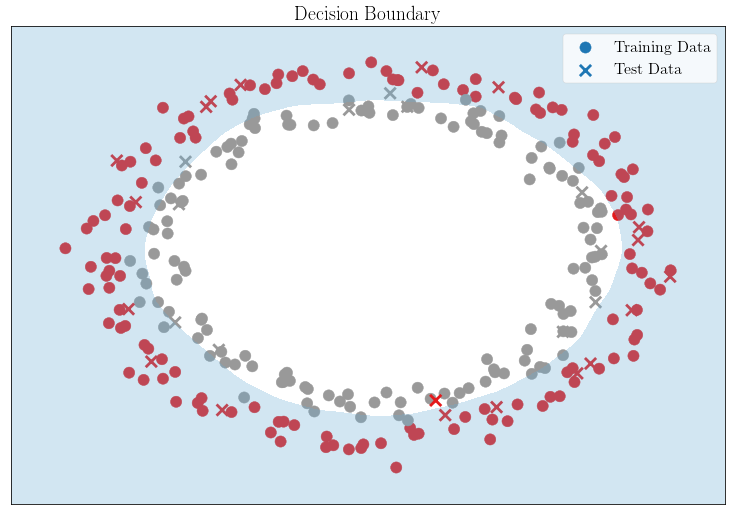

In [26]:
# Define training parameters
epochs = 10 # we train our model for 10 epochs. You can change this value to observe how the accuracy changes.
batch_size = 10 # we use a fixed batch size of 10 data points per batch.
n = len(X_train)

# Define init op
with tf.name_scope('Initializer'):
    init = tf.global_variables_initializer()

# Define op to merge all summaries
merged = tf.summary.merge_all()

# Start a Session 
with tf.Session() as sess:
    
    # Create file writer for TensorBoard
    train_writer = tf.summary.FileWriter('./log/ex2', sess.graph)

    # Initialize all variables
    sess.run(init)
    
    # Get summary data once before starting training
    feed_dict = {x: X_train, y: y_train}
    summary = sess.run(merged, feed_dict=feed_dict)
            
    # Write summary data for TensorBoard
    train_writer.add_summary(summary, 0)
    
    batches = int(math.ceil(float(n / batch_size)))
    print('Batch size: {:d}'.format(batch_size))
    print('Number of iterations per epoch: {:d}'.format(batches))
        
    # Perform training
    for epoch in range(epochs):
        
        # Shuffle training data
        indices = list(range(len(X_train)))
        np.random.shuffle(indices)
        
        # Iterate through the training data in batches
        for batch in range(batches):            
            start = int(batch * batch_size)
            end = int((batch + 1) * batch_size)
            
            if end > n:
                # Reuse some of the training data from the previous batch
                shift = end - n
                start -= shift
                end -= shift
            
            # Create batch
            feed_dict = {x: X_train[indices[start:end]], y: y_train[indices[start:end]]}
            
            # Perform a single step of stochastic gradient descent
            sess.run(step, feed_dict=feed_dict)
            
        # Get accuracy and summaries on training data at the end of each epoch 
        feed_dict = {x: X_train, y: y_train}
        acc, summary = sess.run([accuracy, merged], feed_dict=feed_dict)
            
        # Write summary data for TensorBoard
        train_writer.add_summary(summary, epoch + 1)
        
        # Print accuracy
        print('Epoch: {:d}, Training Accuracy: {:.2f}'.format(epoch, acc))
    
    # Get accuracy on test data at the end of training 
    feed_dict = {x: X_test, y: y_test}
    accuracy = sess.run(accuracy, feed_dict=feed_dict)
    print('Test Accuracy: {:.2f}'.format(accuracy))
    
    plot_boundary(sess, X_train, y_train, X_test, y_test, predictions)

---